<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2024-12-26 15:07:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  61.9MB/s    in 2.5s    

2024-12-26 15:07:21 (61.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 109.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 91.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 114.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 114.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 117.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 15.7 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [3]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [4]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [76]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


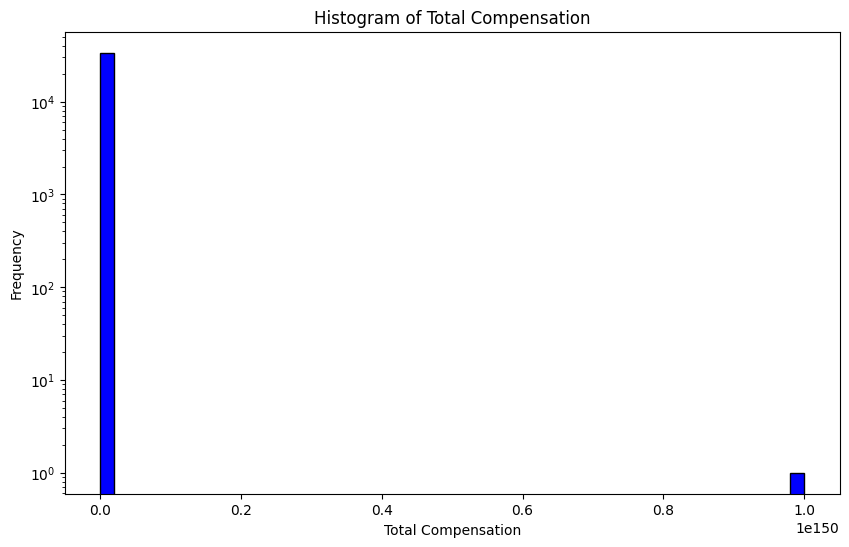

In [18]:
df = pd.read_csv('survey-data.csv')

# Ensure the CompTotal column exists and is numeric
if 'CompTotal' in df.columns:
    df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
    df = df.dropna(subset=['CompTotal'])  # Drop rows with missing CompTotal

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['CompTotal'], bins=50, color='blue', edgecolor='black')
    plt.title('Histogram of Total Compensation')
    plt.xlabel('Total Compensation')
    plt.ylabel('Frequency')
    plt.yscale('log')  # This is optional: We use a log scale for better visibility of outliers
    plt.show()
else:
    print("The 'CompTotal' column is not found in the dataset.")


**Box Plots**

Plot a box plot of Age.


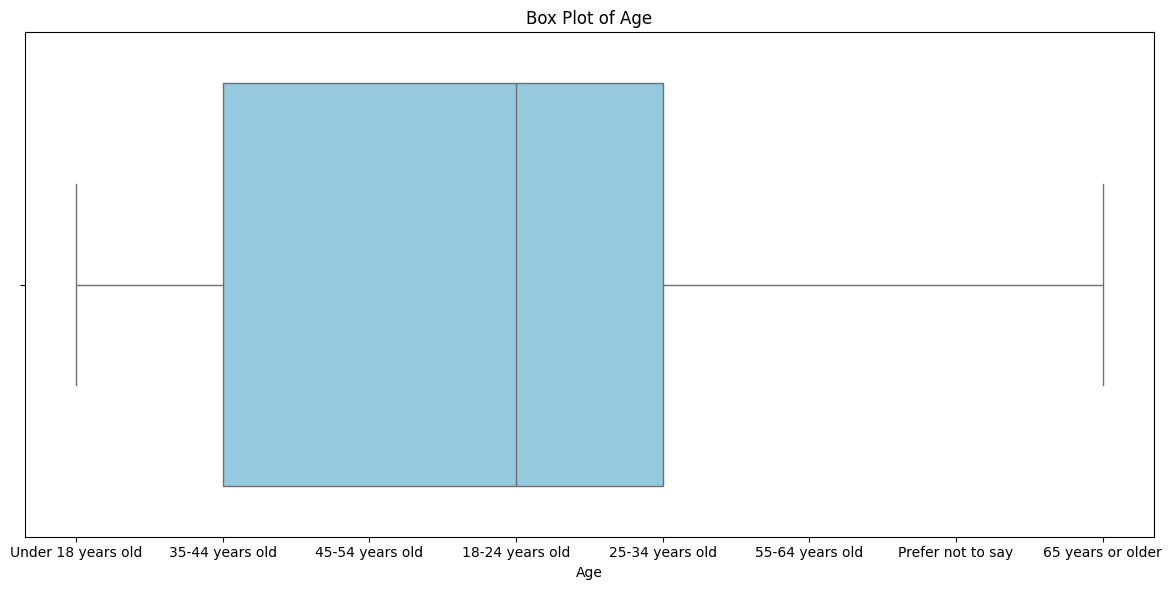

In [39]:
#!pip install seaborn
import seaborn as sns

df = pd.read_csv('survey-data.csv')

# Ensure the Age column exists and is numeric
if 'Age' in df.columns:
    df = df.dropna(subset=['Age'])  # Drop rows with missing Age

    # Seaborn Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['Age'], color='skyblue')
    plt.title('Box Plot of Age')
    plt.xlabel('Age')
    plt.tight_layout()
    plt.show()
else:
    print("The 'Age' column is not found in the dataset.")



### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


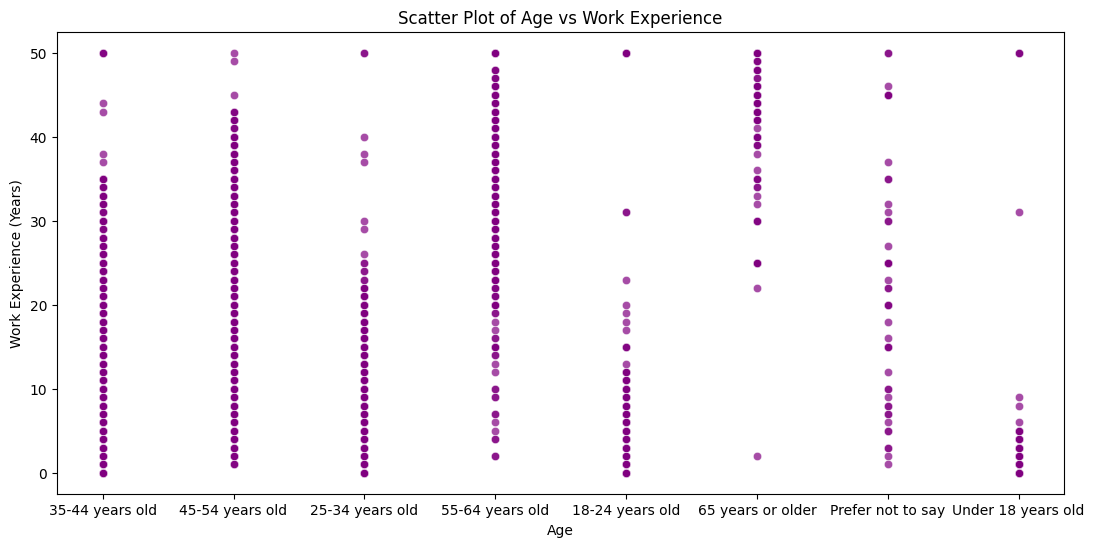

In [51]:
df = pd.read_csv('survey-data.csv')

# Ensure Age and WorkExp columns exist and are numeric
if {'Age', 'WorkExp'}.issubset(df.columns):
    df = df.dropna(subset=['Age', 'WorkExp'])  # Drop rows with missing values

    # Seaborn Scatter Plot
    plt.figure(figsize=(13, 6))
    sns.scatterplot(x='Age', y='WorkExp', data=df, color='purple', alpha=0.7)
    plt.title('Scatter Plot of Age vs Work Experience')
    plt.xlabel('Age')
    plt.ylabel('Work Experience (Years)')
    plt.show()
else:
    print("The required columns ('Age' and 'WorkExp') are not found in the dataset.")


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


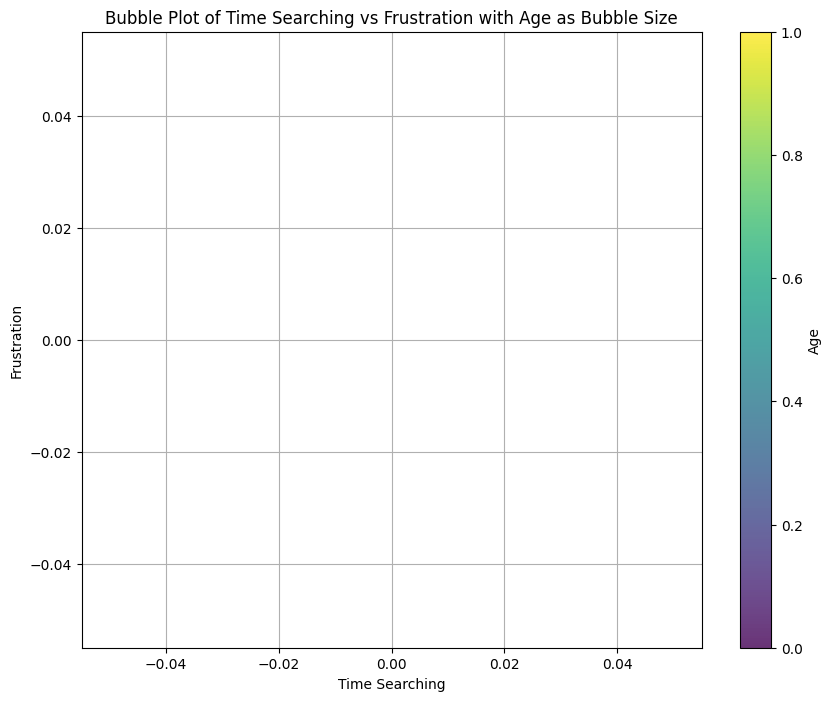

In [102]:
df = pd.read_csv('survey-data.csv')

# Ensure the necessary columns exist and are numeric##########################################################
required_columns = {'TimeSearching', 'Frustration', 'Age'}

if required_columns.issubset(df.columns):
    df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
    df['Frustration'] = pd.to_numeric(df['Frustration'], errors='coerce')
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    df = df.dropna(subset=required_columns)  # Drop rows with missing values

    # Bubble Plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        x=df['TimeSearching'], 
        y=df['Frustration'], 
        s=df['Age'] * 10,  # Scale age to adjust bubble size
        alpha=0.8, 
        c=df['Age'],  # Color based on Age
        cmap='viridis', 
        edgecolors='black'
    )
    plt.title('Bubble Plot of Time Searching vs Frustration with Age as Bubble Size')
    plt.xlabel('Time Searching')
    plt.ylabel('Frustration')
    plt.colorbar(scatter, label='Age')  # Add color bar to indicate age
    plt.grid(True)
    plt.show()
else:
    print(f"The required columns {required_columns} are not found in the dataset.")


### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


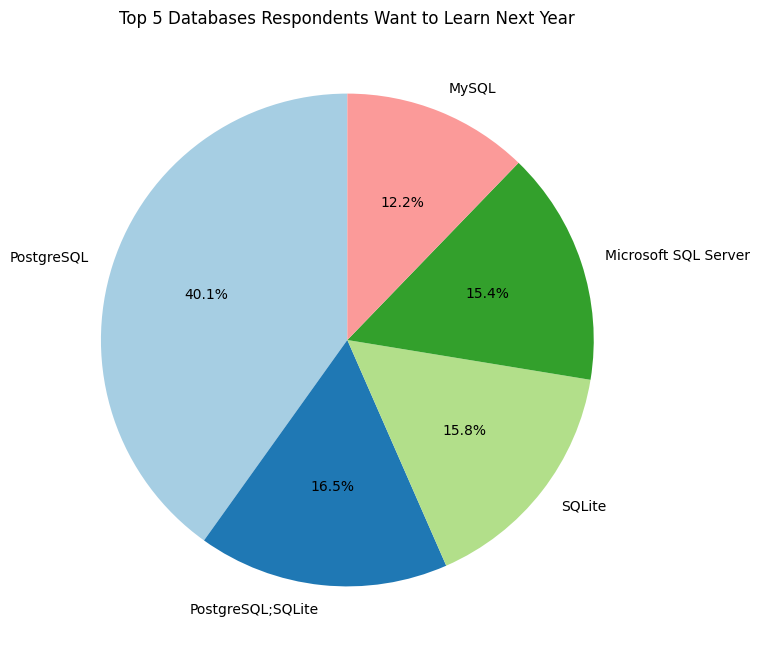

In [103]:
df = pd.read_csv('survey-data.csv')

# Ensure the 'DatabaseWantToWorkWith' column exists
if 'DatabaseWantToWorkWith' in df.columns:
    # Count the occurrences of each unique database
    db_counts = df['DatabaseWantToWorkWith'].value_counts()

    # Get the top 5 databases
    top_5_db = db_counts.head(5)

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(top_5_db, labels=top_5_db.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title('Top 5 Databases Respondents Want to Learn Next Year')
    plt.show()
else:
    print("The 'DatabaseWantToWorkWith' column is not found in the dataset.")



**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


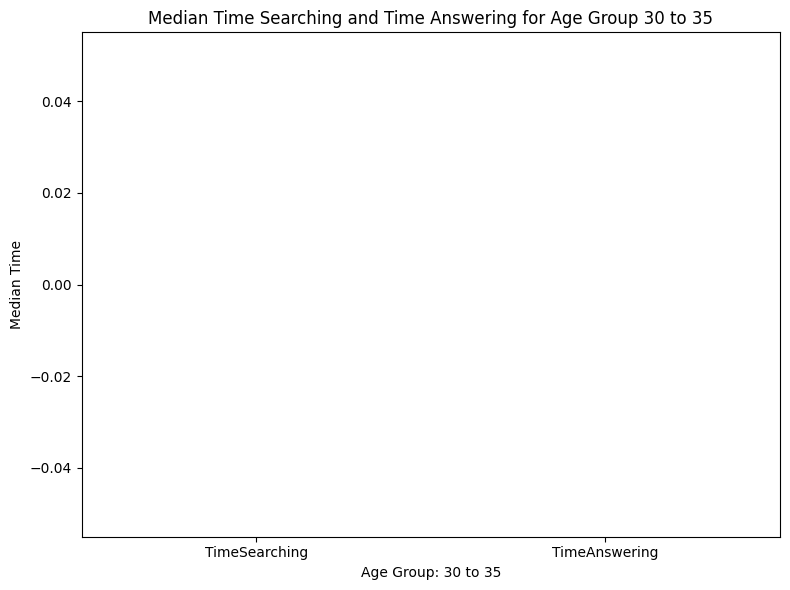

In [107]:
df = pd.read_csv('survey-data.csv')#################################################

# Filter the data for the age group 30 to 35, but 1st convert the column to integer
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_age_group = df[(df['Age'] >= 30) & (df['Age'] <= 35)]

# Calculate the median for TimeSearching and TimeAnswering for the filtered data
median_values = df_age_group[['TimeSearching', 'TimeAnswering']].median()

# Create the stacked bar chart
plt.figure(figsize=(8, 6))
median_values.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])

# Add titles and labels
plt.title('Median Time Searching and Time Answering for Age Group 30 to 35')
plt.xlabel('Age Group: 30 to 35')
plt.ylabel('Median Time')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()

# Show the chart
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


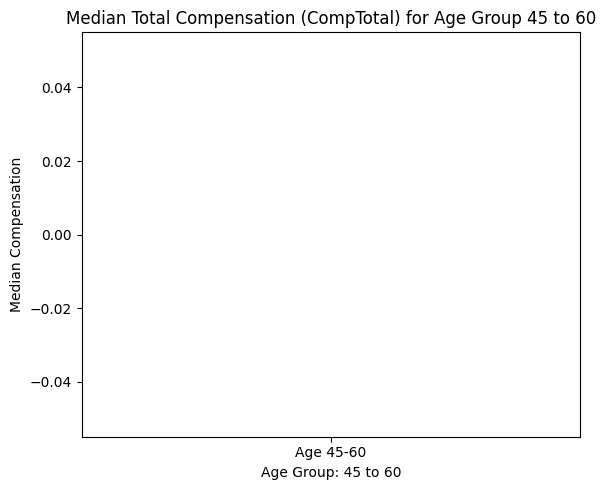

In [116]:
df = pd.read_csv('survey-data.csv')############################################

# Filter the data for the age group 45 to 60
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df_age_group = df[(df['Age'] >= 45) & (df['Age'] <= 60)]

# Calculate the median of CompTotal for the filtered data
median_comp_total = df_age_group['CompTotal'].median()

# Plot the median compensation as a bar chart
plt.figure(figsize=(6, 5))
plt.bar(['Age 45-60'], [median_comp_total], color='teal')

# Add titles and labels
plt.title('Median Total Compensation (CompTotal) for Age Group 45 to 60')
plt.xlabel('Age Group: 45 to 60')
plt.ylabel('Median Compensation')
plt.tight_layout()

# Show the plot
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


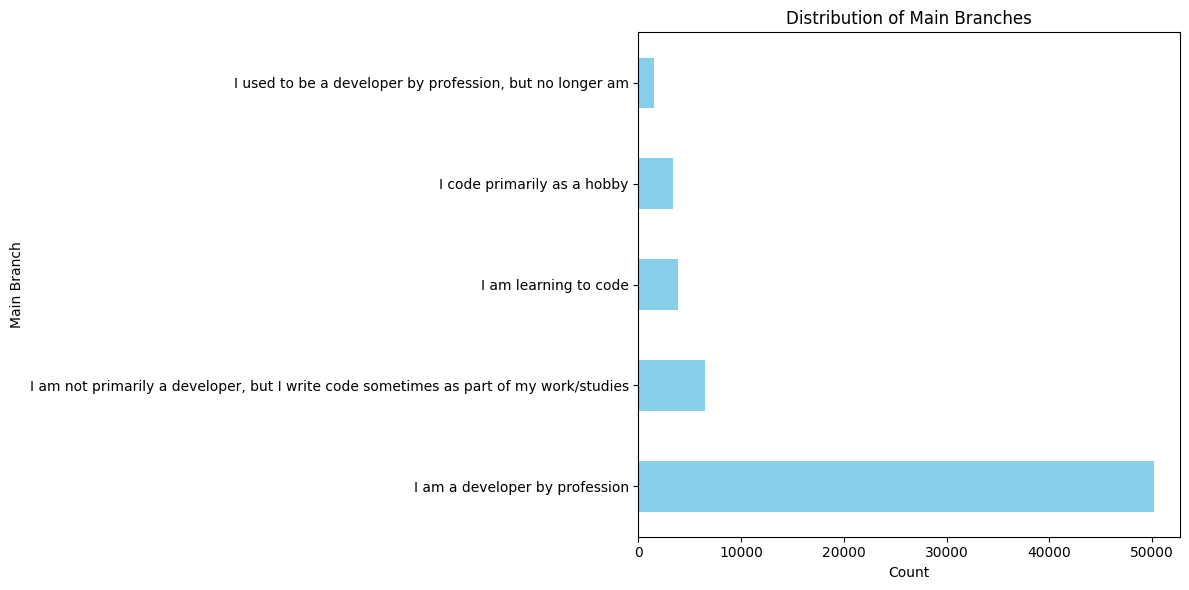

In [121]:

df = pd.read_csv('survey-data.csv')

# Check if the 'MainBranch' column exists
if 'MainBranch' in df.columns:
    # Get the value counts for the 'MainBranch' column
    main_branch_counts = df['MainBranch'].value_counts()

    # Plot the horizontal bar chart
    plt.figure(figsize=(12, 6))
    main_branch_counts.plot(kind='barh', color='skyblue')

    # Add titles and labels
    plt.title('Distribution of Main Branches')
    plt.xlabel('Count')
    plt.ylabel('Main Branch')

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("The 'MainBranch' column is not found in the dataset.")


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
